In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import torch
import os
from sklearn import preprocessing
from sklearn.externals import joblib

<font face="微软雅黑" size=6 color=#000000> 1. Import Data and Link sessions and tracks

In [336]:
# Import Data 
data_path = '/Users/cengqiqi/Desktop/project/data/'

track_features = pd.read_csv(data_path + 'tf_mini.csv')
sessions =pd.read_csv(data_path + 'log_mini.csv')

In [337]:
# Link sessions and tracks
sessions.rename(columns={'track_id_clean':'track_id'}, inplace = True)
sessions_new = pd.merge(left=sessions,right=track_features,how='left',on = 'track_id')

<font face="微软雅黑" size=6 color=#000000>  2. Track Analysis

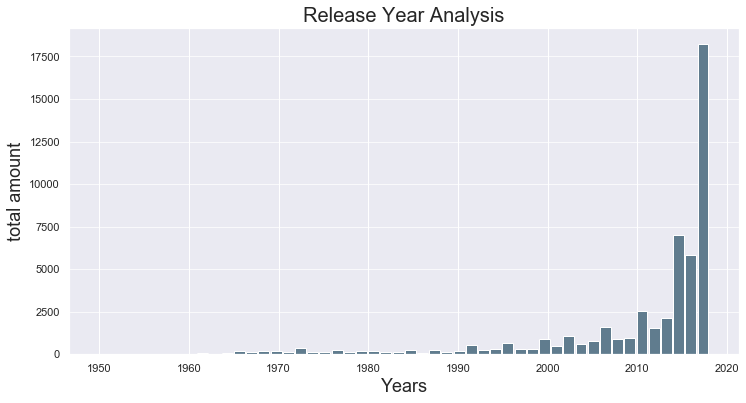

In [338]:
# the distribution of release year
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['release_year'].plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('Release Year Analysis',fontsize = 20)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_1_release_year_distributions.png'), format='png', dpi=300)


***********************************************************************************************
The songs which are more than 500 seconds:  369
***********************************************************************************************


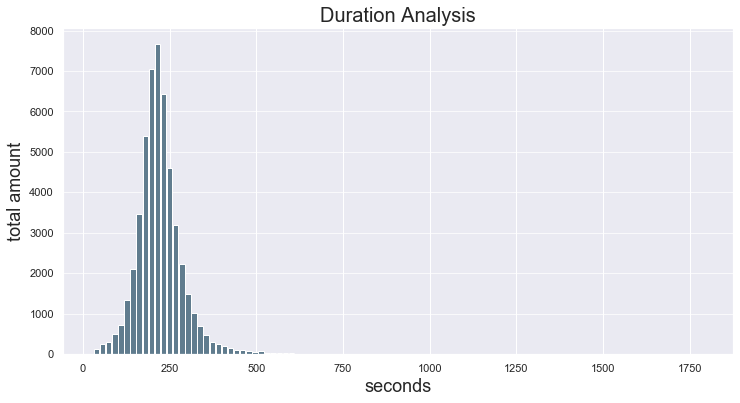

In [339]:
# the distribution of duration
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['duration'].plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('Duration Analysis',fontsize = 20)
plt.xlabel('seconds', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_2_duration_distributions.png'), format='png', dpi=300)

num_of_long_songs = track_features[track_features['duration']>500].count()['duration']
print('*'*95)
print('The songs which are more than 500 seconds: ', num_of_long_songs)
print('*'*95)

***********************************************************************************************
there are 17020 out of 167880 tracks estimated less than 99.5. 
there are 10442 out of 167880 tracks estimated less than 99. 
***********************************************************************************************


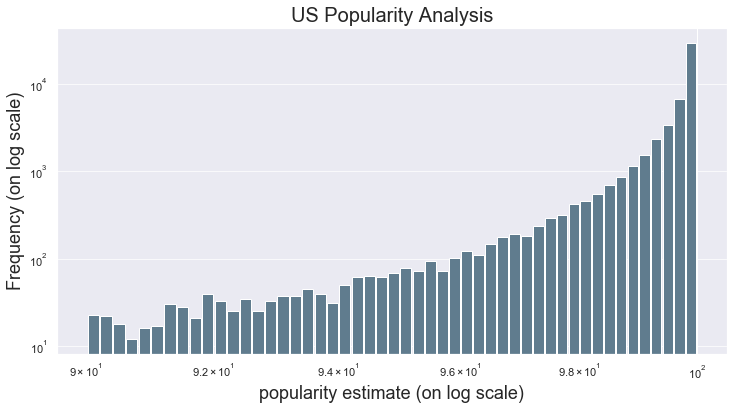

In [340]:
# analysis us_popularity_estimate
plt.figure(figsize=(12,6))
plt.xscale('log')
plt.yscale('log')
track_features['us_popularity_estimate'].plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('US Popularity Analysis',fontsize = 20)
plt.xlabel('popularity estimate (on log scale)', fontsize = 18)
plt.ylabel('Frequency (on log scale)', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_4_popularity_distributions.png'), format='png', dpi=300)

# find Minority Music
minority1= len(sessions_new.loc[sessions_new['us_popularity_estimate'] < 99.5])
minority2 = len(sessions_new.loc[sessions_new['us_popularity_estimate'] < 99])
print('*'*95)
print(f'there are {minority1} out of {len(sessions_new)} tracks estimated less than 99.5. ')
print(f'there are {minority2} out of {len(sessions_new)} tracks estimated less than 99. ')
print('*'*95)

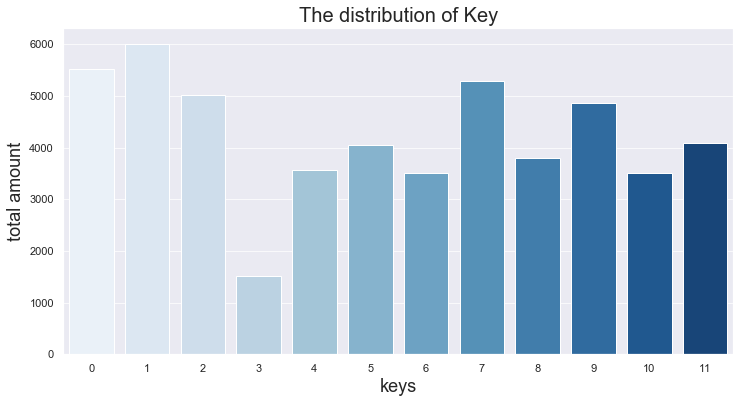

In [341]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='key',data=track_features, palette="Blues")
plt.title('The distribution of Key',fontsize = 20)
plt.xlabel('keys', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_5_key_distributions.png'), format='png', dpi=300)

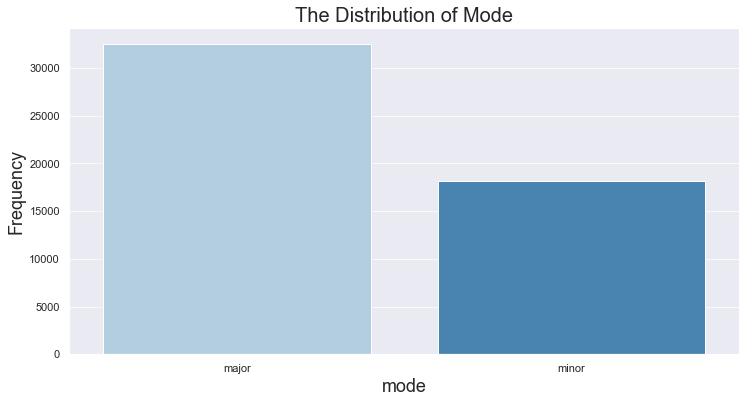

In [342]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='mode',data=track_features, palette="Blues")
plt.title('The Distribution of Mode',fontsize = 20)
plt.xlabel('mode', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_6_mode_distributions.png'), format='png', dpi=300)

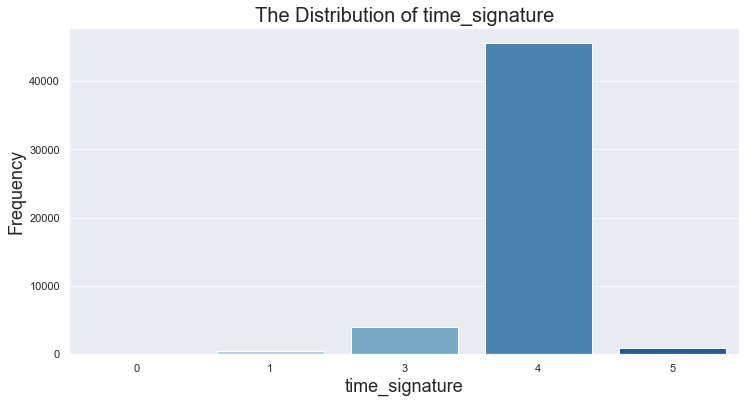

In [343]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='time_signature',data=track_features, palette="Blues")
plt.title('The Distribution of time_signature',fontsize = 20)
plt.xlabel('time_signature', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_7_time_signature_distributions.png'), format='png', dpi=300)

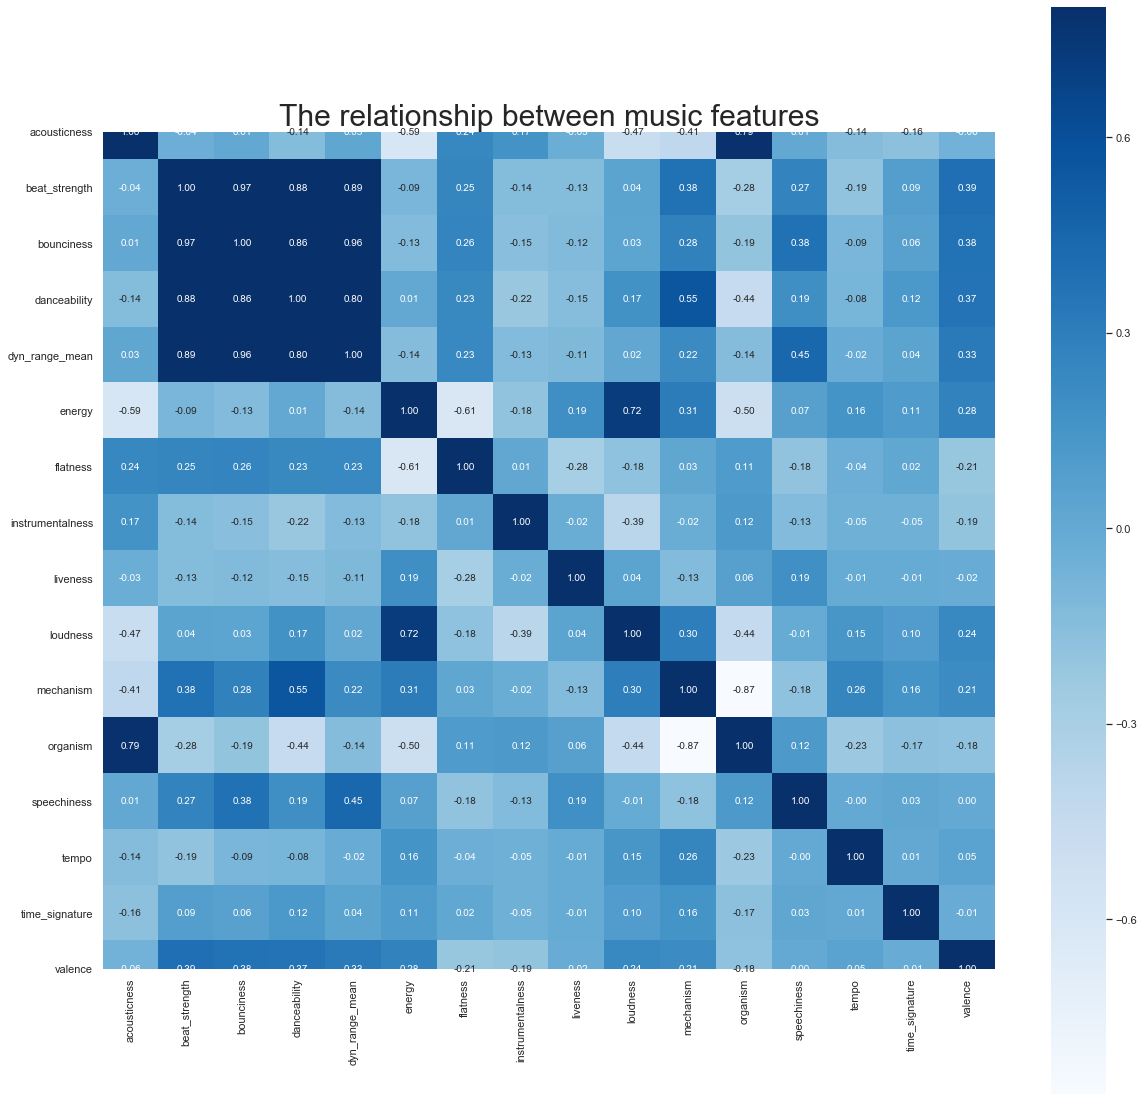

In [344]:
feature_correlation= track_features[['acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence']].corr()

plt.subplots(figsize=(20, 20))
sns.heatmap(feature_correlation, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10},  cmap="Blues")
plt.title('The relationship between music features',fontsize = 30)
plt.savefig(os.path.join('figures/tracks_features', 'tf_8_music_features.png'), format='png', dpi=300)

Text(0.5, 1, 'The relationship between acoustics')

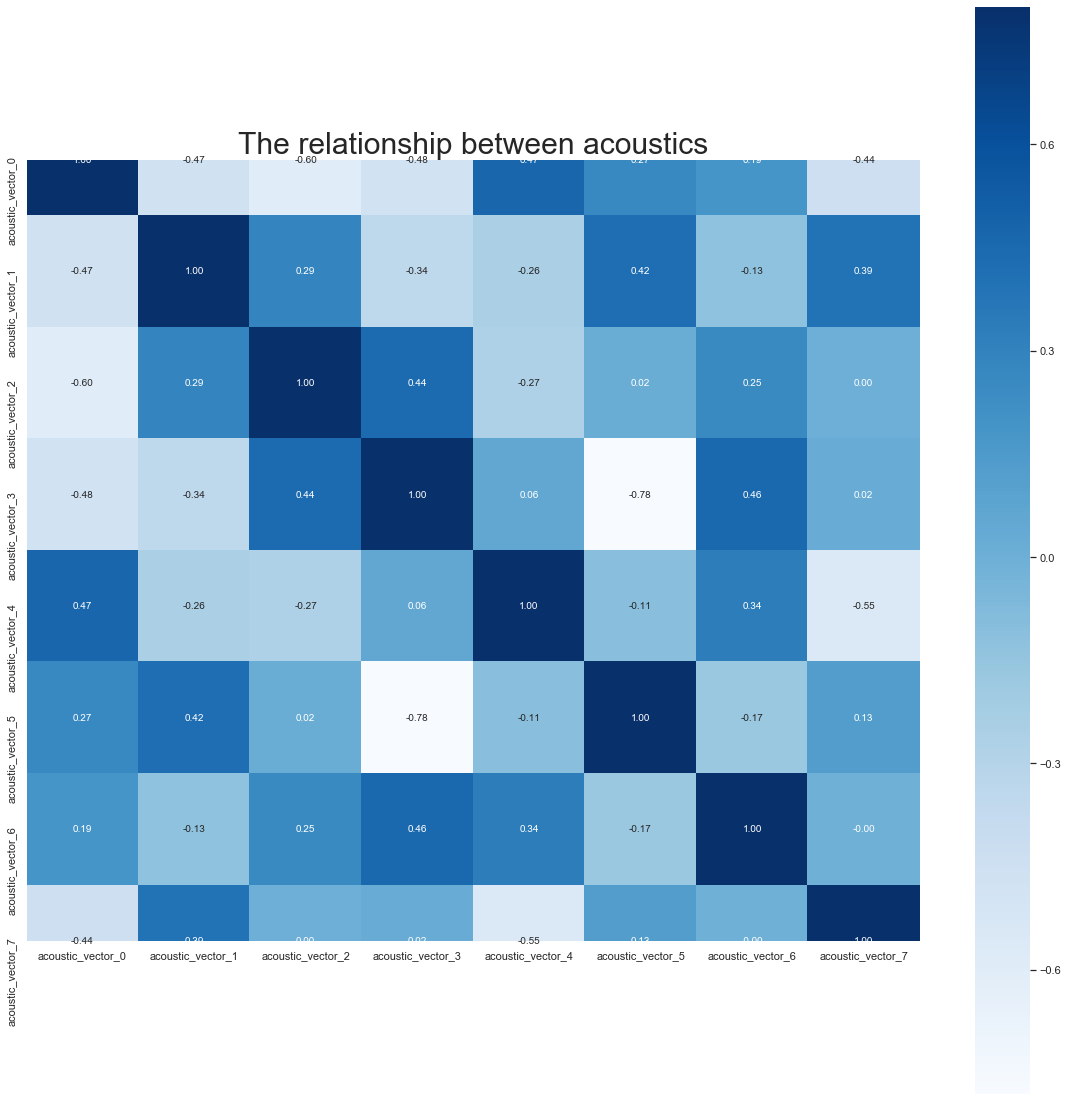

In [345]:
feature_correlation= track_features[['acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']].corr()

plt.subplots(figsize=(20, 20))
sns.heatmap(feature_correlation, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10},  cmap="Blues")
plt.title('The relationship between acoustics', fontsize = 30)

<font face="微软雅黑" size=6 color=#000000>  3. session analysis

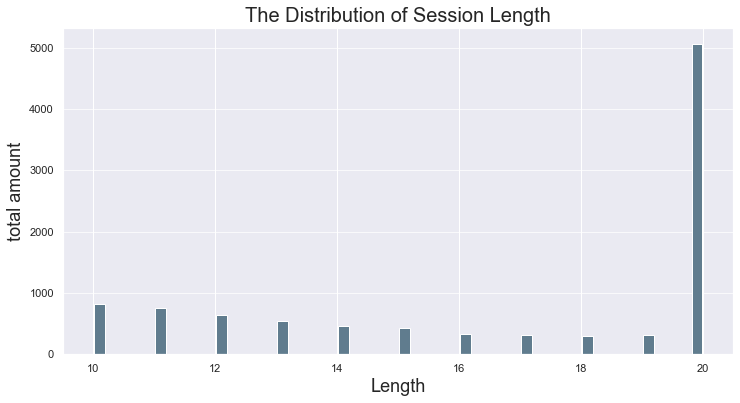

In [346]:
#group = sessions_new.groupby('session_id')
grouped = sessions_new['session_length'].groupby(sessions_new['session_id'])
length_array = grouped.mean()

# the distribution of session length
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
length_array.plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('The Distribution of Session Length',fontsize = 20)
plt.xlabel('Length', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/sessions', 'tf_1_release_year_distributions.png'), format='png', dpi=300)


The correlation between skip and context_switch is  -0.04905894477292282


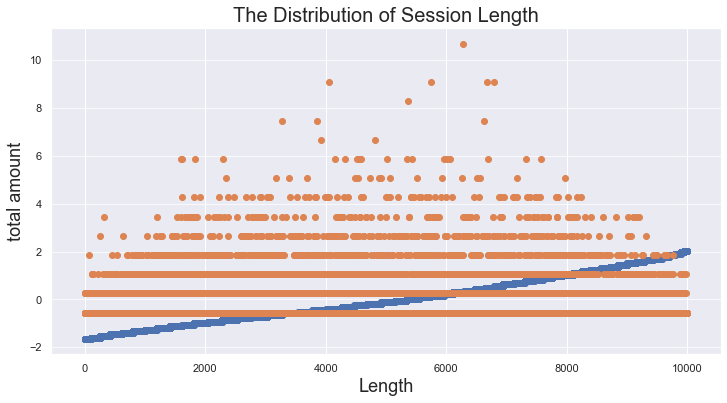

In [347]:
# the relationship between skip behaviour and context_switch

# process skip (add all the skips together)

# grouped = sessions_new[['skip_1','skip_2','skip_3','not_skipped']].groupby(sessions_new['session_id'])
# grouped.sum() # skip_3 + not_skipped ! = sessions length?

grouped_skip = sessions_new[['skip_1','skip_2','skip_3']].groupby(sessions_new['session_id'])
total_skip = pd.DataFrame(grouped_skip.sum()).sum(axis=1)

mean_skip = np.mean(total_skip)
std_skip = np.std(total_skip)
skip_line= (total_skip-mean_skip)/std_skip


# process context_switch
grouped_switch = sessions_new['context_switch'].groupby(sessions_new['session_id'])
total_switch = grouped_switch.sum()

mean_switch = np.mean(total_switch)
std_switch = np.std(total_switch)
switch_line= (total_switch-mean_switch)/std_switch


# correlation
corr_ = total_skip.corr(total_switch)
print('The correlation between skip and context_switch is ', corr_)

# plot (skip_line in ascending order)
s_c = pd.concat([skip_line, switch_line], axis=1).reset_index()
s_c_sorted = s_c.sort_values(0)

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(range(len(s_c_sorted[0])),s_c_sorted[0].values)
plt.scatter(range(len(s_c_sorted['context_switch'])),s_c_sorted['context_switch'].values)

plt.title('The Distribution of Session Length',fontsize = 20)
plt.xlabel('Length', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

In [348]:
# the relationship between hist_user_behavior_n_seekfwd, hist_user_behavior_n_seekback and skip
skip_total = sessions_new[['skip_1','skip_2','skip_3']].sum(axis = 1)
corr_1 = skip_total.corr(sessions_new['hist_user_behavior_n_seekfwd'])
corr_2 = skip_total.corr(sessions_new['hist_user_behavior_n_seekback'])

print('*'*95)
print('The correlation between hist_user_behavior_n_seekfwd and skip number is ', corr_1)
print('The correlation between hist_user_behavior_n_seekback and skip number is ', corr_2)
print('*'*95)

***********************************************************************************************
The correlation between hist_user_behavior_n_seekfwd and skip number is  0.002331981424965397
The correlation between hist_user_behavior_n_seekback and skip number is  -0.04043819310440463
***********************************************************************************************


In [349]:
# the premium analysis

# the percentage of premium
per = sessions_new['premium'].sum()/len(sessions_new)
print('*'*95)
print('The the percentage of premium is ', per)
print('*'*95)

# the probability of skip
pre = sessions_new.loc[sessions_new['premium'] == True]
notPre = sessions_new.loc[sessions_new['premium'] == False]

skip_probability_1 = pre[['skip_1','skip_2','skip_3']].sum().sum()/3/len(pre)
skip_probability_2 = notPre[['skip_1','skip_2','skip_3']].sum().sum()/3/len(notPre)

print(' ')
print('*'*95)
print('The average probability of a premium to skip a track is ', skip_probability_1)
print('The average probability of a non-premium to skip a track is ', skip_probability_2)
print('*'*95)


***********************************************************************************************
The the percentage of premium is  0.8104181558255897
***********************************************************************************************
 
***********************************************************************************************
The average probability of a premium to skip a track is  0.525216888516485
The average probability of a non-premium to skip a track is  0.5452812601459976
***********************************************************************************************


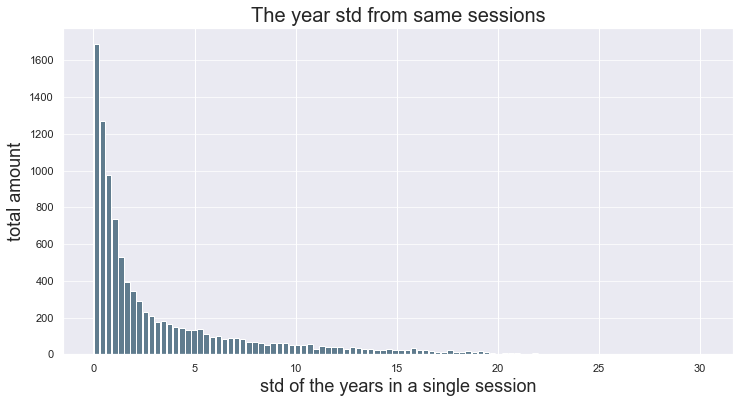

In [350]:
# the std of relase year within a session 
# this result shows that users tends to listening to songs from the same generation
grouped_year = sessions_new['release_year'].groupby(sessions_new['session_id'])
std_year = grouped_year.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_year.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The year std from same sessions',fontsize = 20)
plt.xlabel('std of the years in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)



***********************************************************************************************
The result shows that users tends to listen to the music with similar pupolarity.
i.e., some users only listen to the popular songs, and some users preder minority music.
***********************************************************************************************


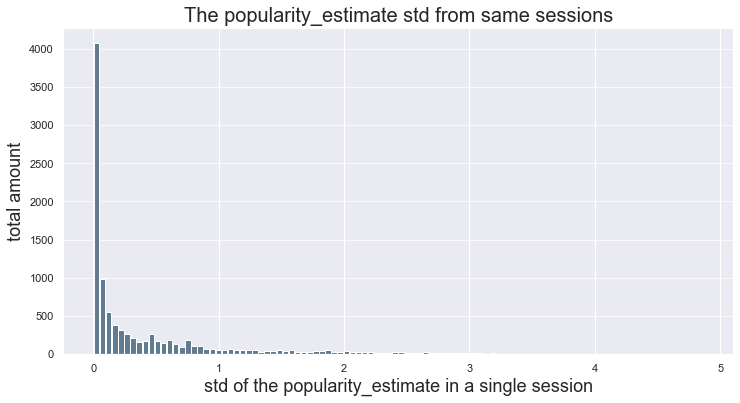

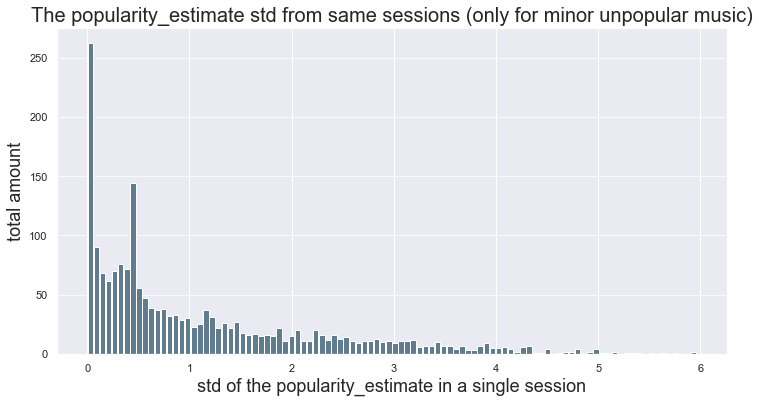

In [351]:
# the popuarity of us_popularity_estimate within a session (std) 

grouped_p = sessions_new['us_popularity_estimate'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

# Analysis of Minority Music
minority1= sessions_new.loc[sessions_new['us_popularity_estimate'] < 99]
grouped_m = minority1['us_popularity_estimate'].groupby(minority1['session_id'])
std_m = grouped_m.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_m.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions (only for minor unpopular music)',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

print('*'*95)
print('The result shows that users tends to listen to the music with similar pupolarity.')
print('i.e., some users only listen to the popular songs, and some users preder minority music.')
print('*'*95)

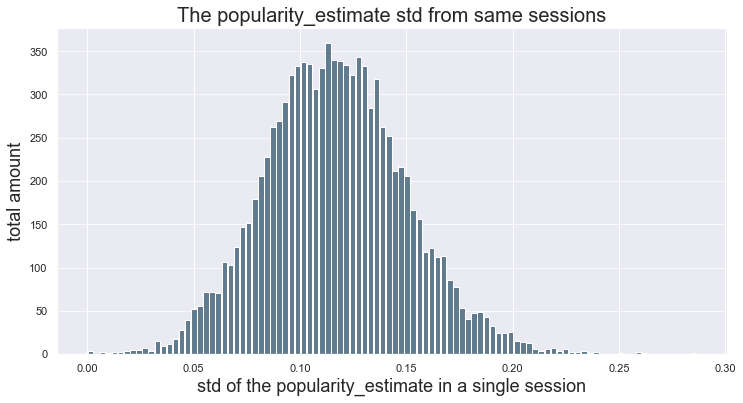

In [352]:
# the music style analysis 1

grouped_p = sessions_new['beat_strength'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

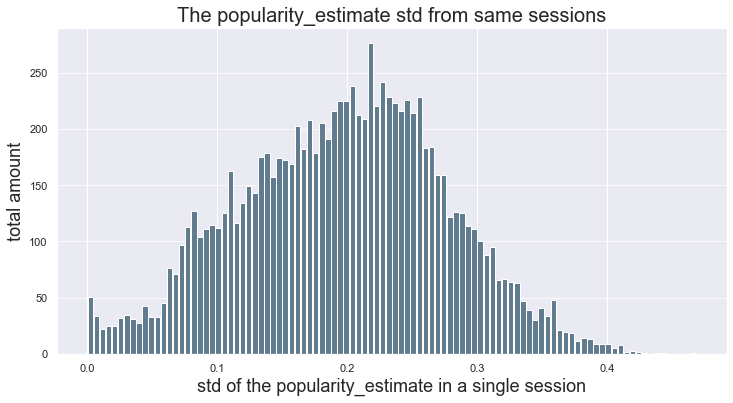

In [353]:
# the music style analysis 2

grouped_p = sessions_new['acousticness'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

***********************************************************************************************
This result shows that users have strong preference in instrumentalness.
***********************************************************************************************


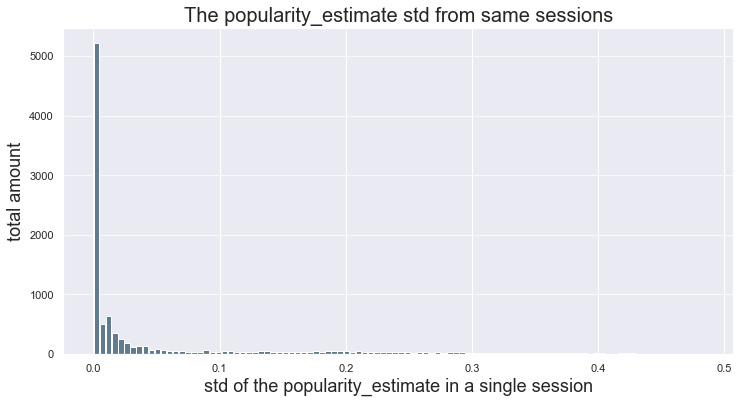

In [354]:
# the music style analysis 3

grouped_p = sessions_new['instrumentalness'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

print('*'*95)
print('This result shows that users have strong preference in instrumentalness.')
print('*'*95)

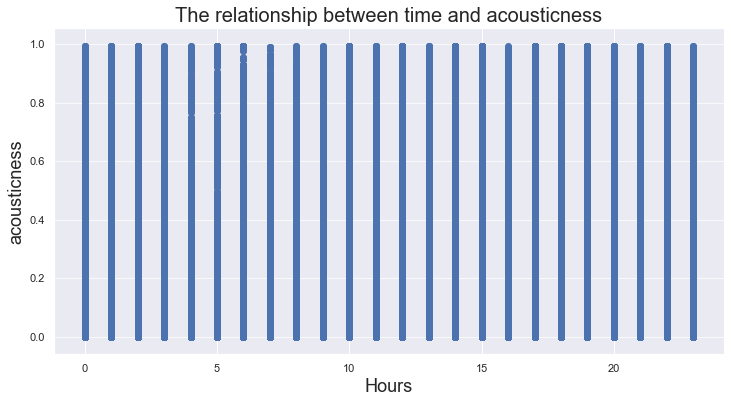

In [355]:
# the relationship between hour_of_day and music style 1
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['acousticness'])

plt.title('The relationship between time and acousticness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('acousticness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

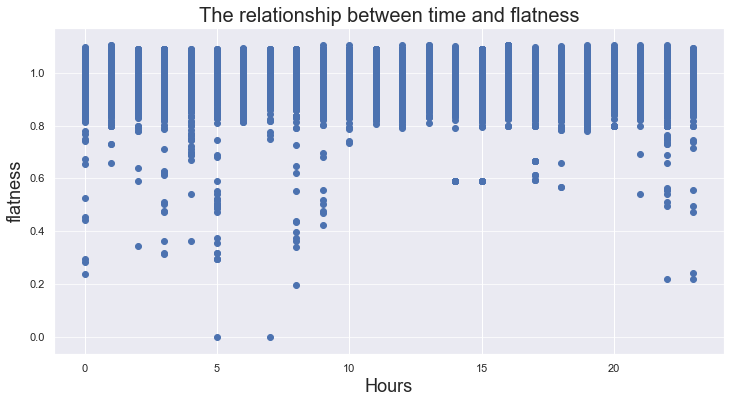

In [356]:
# the relationship between hour_of_day and music style 2
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['flatness'])

plt.title('The relationship between time and flatness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('flatness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

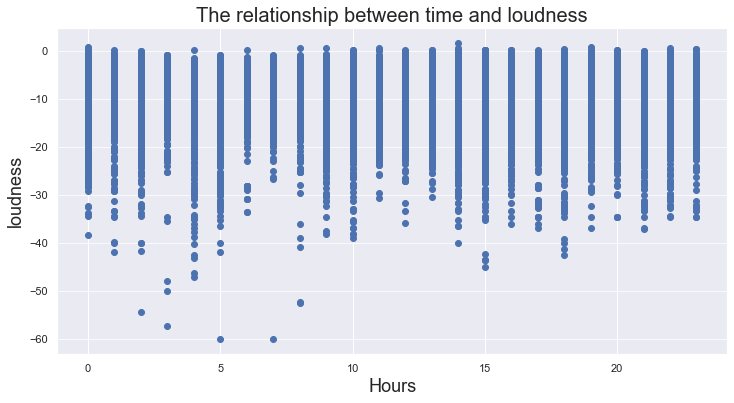

In [357]:
# the relationship between hour_of_day and music style 3
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['loudness'])

plt.title('The relationship between time and loudness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('loudness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)


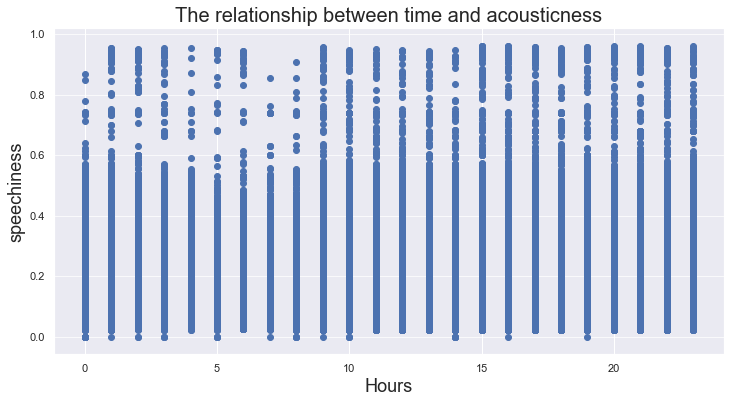

In [359]:
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['speechiness'])

plt.title('The relationship between time and acousticness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('speechiness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)